In [1]:
import numpy as np 

In [2]:
x=np.array([258, 270, 294, 320, 342, 368, 446, 480, 586])[:,np.newaxis]
y=np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 391.2, 390.8])[:, np.newaxis]

In [5]:
from sklearn.linear_model import LinearRegression, RANSACRegressor 

In [9]:
ransac=RANSACRegressor(LinearRegression(), min_samples=4, max_trials=100)

In [10]:
ransac.fit(x,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=4, random_state=None,
                residual_threshold=None, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [11]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
from sklearn.metrics import mean_squared_error,r2_score

In [14]:
print(mean_squared_error(ransac.predict(x),y))
print(r2_score(ransac.predict(x),y))
print(mean_squared_error(lr.predict(x),y))
print(r2_score(lr.predict(x),y))

493.95631848841276
0.833723072793484
493.95631848841276
0.833723072793484


In [18]:
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

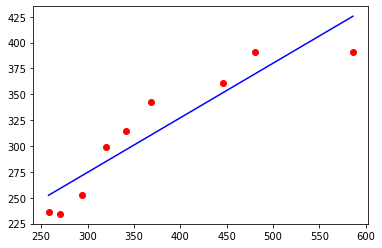

In [20]:
import matplotlib.pyplot as plt 
plt.scatter(x[inlier_mask],y[inlier_mask],c='red',marker='o')
plt.scatter(x[outlier_mask],y[outlier_mask],c='green',marker='o')
plt.plot(x, ransac.predict(x),c='blue')
plt.show()

In [26]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
import pandas as pd 
dataset=pd.read_csv(url, header=None, skipinitialspace=True, sep='\s+')
dataset.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [27]:
target=dataset[[0]]
data=dataset[[4]]

In [28]:
data.shape

(398, 1)

In [29]:
target.shape

(398, 1)

In [31]:
pd.DataFrame(data).describe()

,4
count,398.000000
mean,2970.424623
std,846.841774
min,1613.000000
25%,2223.750000
50%,2803.500000
75%,3608.000000
max,5140.000000


In [32]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

In [35]:
ransac1=RANSACRegressor(LinearRegression() , min_samples=50)
ransac1.fit(data,target)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50,
                random_state=None, residual_threshold=None, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [36]:
inlier_mask=ransac1.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

In [40]:
a=np.arange(5110,6000)[:,np.newaxis]

In [41]:
a.shape

(890, 1)

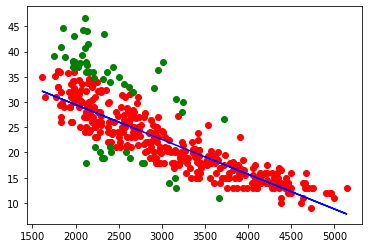

In [42]:
import matplotlib.pyplot as plt 
plt.scatter(data[inlier_mask],target[inlier_mask],c='red',marker='o')
plt.scatter(data[outlier_mask],target[outlier_mask],c='green',marker='o')
plt.plot(data, ransac1.predict(data),c='blue')
plt.show()

In [43]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
lasso=Lasso()
ridge=Ridge()
enet=ElasticNet()

In [48]:
lasso.fit(data,target)
ridge.fit(data,target)
enet.fit(data,target)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
from sklearn.metrics import mean_squared_error , r2_score

In [50]:
print(mean_squared_error(lasso.predict(data),target))
print(r2_score(lasso.predict(data),target))

18.780941132566742
0.5543185118952179


In [51]:
print(mean_squared_error(ridge.predict(data),target))
print(r2_score(ridge.predict(data),target))

18.780939734628394
0.554480847556848


In [52]:
print(mean_squared_error(enet.predict(data),target))
print(r2_score(enet.predict(data),target))

18.780940089498795
0.5543990776207632


In [53]:
lr.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
print(mean_squared_error(lr.predict(data), target))
print(r2_score(lr.predict(data), target))

18.780939734628397
0.554480850686538


In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
dt=DecisionTreeRegressor()
dt.fit(data,target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [57]:
print(mean_squared_error(dt.predict(data), target))
print(r2_score(dt.predict(data), target))

2.2505548576214403
0.9616506226123485


In [63]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10)
rfr.fit(data, target)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [64]:
print(mean_squared_error(rfr.predict(data), target))
print(r2_score(rfr.predict(data), target))

5.741140002570962
0.8902406463173574


In [70]:
from sklearn.svm import SVR
svr=SVR()


In [71]:
svr.fit(data,target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
print(mean_squared_error(svr.predict(data), target))
print(r2_score(svr.predict(data), target))

45.77705823424721
-22.568343991778058
